In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
ic = pd.read_csv('icdata.csv')
ic.sample(6)

,Temperature,Revenue
339,9.557276,235.364643
336,19.849241,416.848618
27,29.185045,679.317791
492,23.056214,552.819351
330,28.649192,689.851691
323,22.870562,550.055216


In [22]:
ic.describe(), ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


(       Temperature      Revenue
 count   500.000000   500.000000
 mean     22.232225   521.570777
 std       8.096388   175.404751
 min       0.000000    10.000000
 25%      17.122258   405.558681
 50%      22.392791   529.368565
 75%      27.740674   642.257922
 max      45.000000  1000.000000,
 None)

In [23]:
ic.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [24]:
ic.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


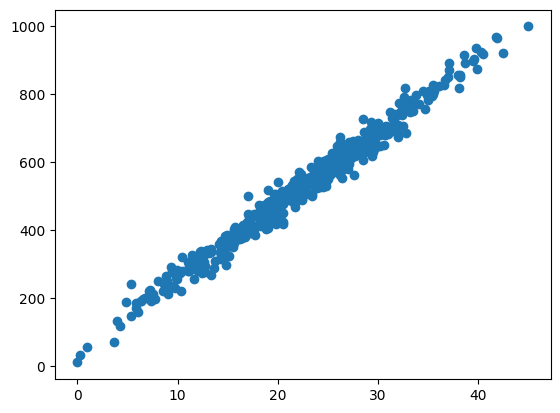

In [25]:
plt.scatter(ic['Temperature'], ic['Revenue'])

<Axes: xlabel='Temperature', ylabel='Revenue'>

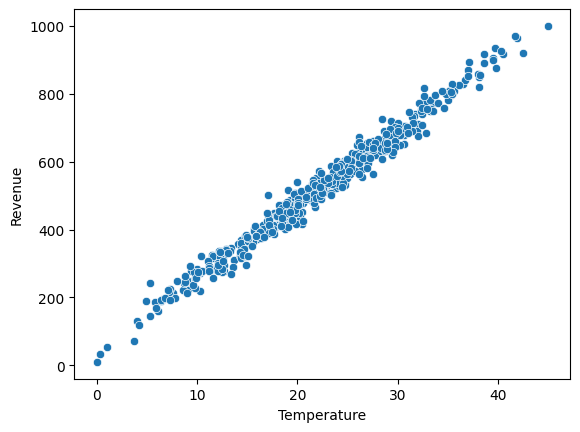

In [27]:
sns.scatterplot(ic, x='Temperature', y='Revenue')

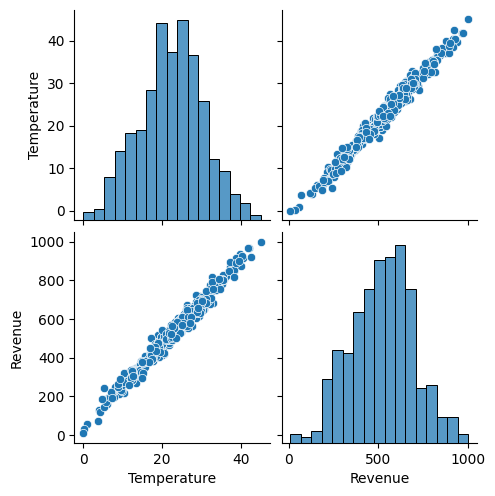

In [28]:
sns.pairplot(ic)

In [42]:
x = ic.drop(['Revenue'], axis=1)
y = ic['Revenue']
x.shape, y.shape

((500, 1), (500,))

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((375, 1), (375,), (125, 1), (125,))

In [45]:
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.coef_, lm.intercept_

(array([21.35234256]), 48.121148190388226)

In [48]:
y_predicted = lm.predict(x_test)
y_predicted

array([263.70816198, 235.90011715, 469.36181683, 494.31291993,
       673.85238396, 410.14537246, 655.79905519, 418.81344454,
       373.34273725, 379.53431339, 686.96848016, 370.60391049,
       558.05191664, 528.18155858, 494.39738062, 601.68428034,
       469.93044679, 737.74482949, 511.55138501, 441.85795277,
       387.97950544, 178.24012884, 319.39663352, 138.57959954,
       623.00319794, 628.60188273, 607.29565226, 576.10381971,
       511.13443376, 451.3327834 , 597.25989496, 589.04901348,
       172.44158293, 838.09555824, 380.9627725 , 601.90216263,
       591.70559123, 639.68906355, 393.84327935, 714.93320805,
       651.59879617, 537.95065716, 604.95618648, 485.31084341,
       640.03883114, 608.63606671, 759.4743898 , 306.1556955 ,
       662.92253382, 859.48101401, 641.29989067, 126.37042837,
       522.67957258, 527.43925806, 266.87712869, 788.57867598,
       512.57927184, 293.74777045, 508.06040875, 731.48511418,
       486.09265666, 797.47724489, 355.25502651, 257.64

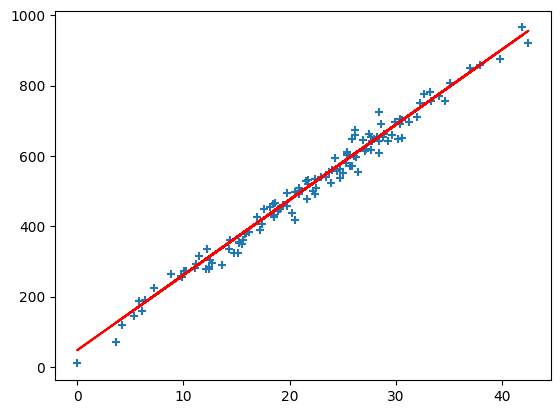

In [53]:
plt.scatter(x_test, y_test, marker='+')
plt.plot(x_test, y_predicted, color='red')

In [67]:
sse = np.sum(np.square(y_test - y_predicted))

mse = mean_squared_error(y_test, y_predicted)
mse2 = sse / len(y_test)

sst = np.sum(np.square(y_test - np.mean(y_test)))

mae = mean_absolute_error(y_test, y_predicted)
mae2 = np.mean(np.abs(y_test - y_predicted))

rmse = np.sqrt(mse)

r2score = r2_score(y_test, y_predicted)

sse, sst, mae, mae2, mse, mse2, rmse, r2score

(78342.56044018906,
 4242535.100586258,
 19.701606340966034,
 19.701606340966034,
 626.7404835215125,
 626.7404835215125,
 25.034785469851993,
 0.9815340218565632)